In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import pandas_datareader.data as pdr
import datetime # crucial when using time series data

In [9]:
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2024, 9, 1)
us_cpi = pdr.DataReader("CPIAUCSL", "fred", start_date, end_date)
kor_cpi = pdr.DataReader("KORCPIALLMINMEI", "fred", start_date, end_date)
germany_cpi = pdr.DataReader("DEUCPALTT01CTGYM", "fred", start_date, end_date)
exchange_krwusd = pdr.DataReader("DEXKOUS", "fred", start_date, end_date)

In [10]:
us_cpi

,CPIAUCSL
DATE,
2010-01-01,217.488
2010-02-01,217.281
2010-03-01,217.353
2010-04-01,217.403
2010-05-01,217.290
...,...
2024-05-01,313.225
2024-06-01,313.049
2024-07-01,313.534


In [11]:
kor_cpi

,KORCPIALLMINMEI
DATE,
2010-01-01,89.974884
2010-02-01,90.156202
2010-03-01,90.338575
2010-04-01,90.702265
2010-05-01,90.793978
...,...
2023-07-01,117.224252
2023-08-01,118.415470
2023-09-01,119.111225


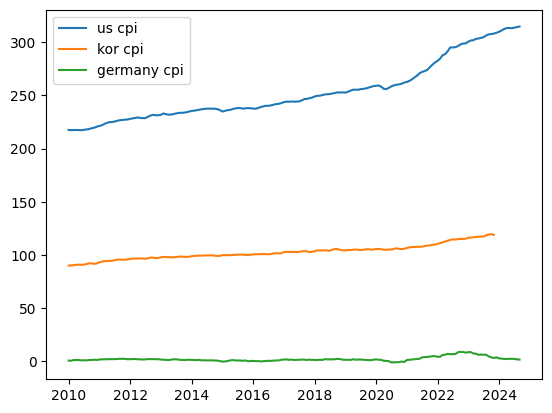

In [12]:
plt.plot(us_cpi, label = "us cpi")
plt.plot(kor_cpi, label = "kor cpi")
plt.plot(germany_cpi, label = "germany cpi")
plt.legend()

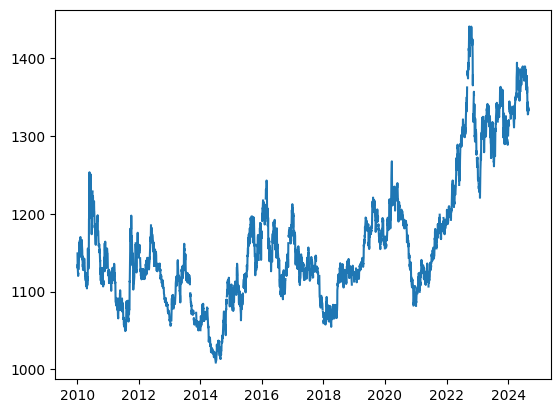

In [13]:
plt.plot(exchange_krwusd)

# cpi에서 inflation rate 구하기

계절성고려 year over year 전년 동월 대비로 구할것임

In [14]:
us_cpi_yoy = us_cpi.pct_change(periods = 12) # percent change 12months
kor_cpi_yoy = kor_cpi.pct_change(periods = 12)

In [15]:
us_cpi_yoy.head(24)

,CPIAUCSL
DATE,
2010-01-01,NaN
2010-02-01,NaN
2010-03-01,NaN
2010-04-01,NaN
2010-05-01,NaN
2010-06-01,NaN
2010-07-01,NaN
2010-08-01,NaN
2010-09-01,NaN


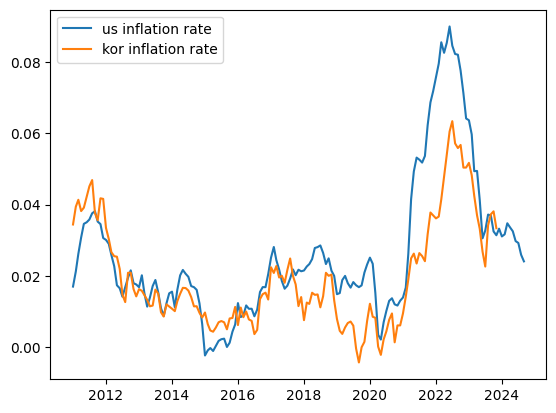

In [16]:
plt.plot(us_cpi_yoy, label = "us inflation rate")
plt.plot(kor_cpi_yoy, label = "kor inflation rate")
plt.legend()

how to find absolute PPP

E = P / P_EURO

In [17]:
euro_cpi = pdr.DataReader("CP0000EZ19M086NEST", "fred", start_date, end_date)
exchange_usd_euro = pdr.DataReader("DEXUSEU", "fred", start_date, end_date)

In [18]:
us_cpi.head()

,CPIAUCSL
DATE,
2010-01-01,217.488
2010-02-01,217.281
2010-03-01,217.353
2010-04-01,217.403
2010-05-01,217.290


In [19]:
euro_cpi.head()

,CP0000EZ19M086NEST
DATE,
2010-01-01,91.56
2010-02-01,91.85
2010-03-01,92.86
2010-04-01,93.24
2010-05-01,93.35


In [20]:
df_us_euro_cpi = us_euro_cpi = us_cpi["CPIAUCSL"] / euro_cpi["CP0000EZ19M086NEST"]

In [21]:
us_euro_cpi.head()

,0
DATE,
2010-01-01,2.375360
2010-02-01,2.365607
2010-03-01,2.340653
2010-04-01,2.331650
2010-05-01,2.327691


In [22]:
df_us_euro_cpi.rename("euro_us_cpi", inplace = True)

,euro_us_cpi
DATE,
2010-01-01,2.375360
2010-02-01,2.365607
2010-03-01,2.340653
2010-04-01,2.331650
2010-05-01,2.327691
...,...
2024-05-01,2.480401
2024-06-01,2.473718
2024-07-01,2.478530


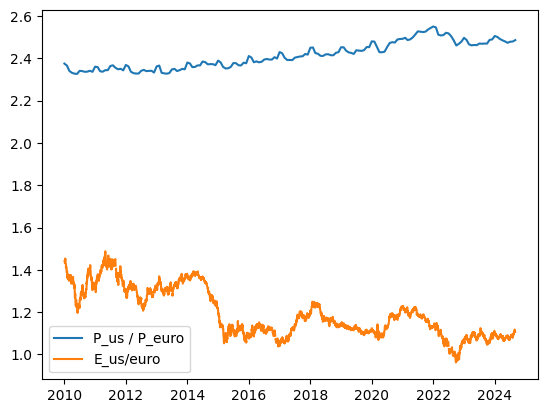

In [23]:
plt.plot(df_us_euro_cpi, label = "P_us / P_euro")
plt.plot(exchange_usd_euro, label = "E_us/euro")
plt.legend()
# 완전 자유무역이 아니라서
#관세 어쩌구저쩌구
# not suitable

# relative PPP

환율의 변동률과 같다

In [24]:
us_cpi_yoy = us_cpi.pct_change(periods = 12)
eu_cpi_yoy = euro_cpi.pct_change(periods = 12)

In [25]:
eu_cpi_yoy.head(24)

,CP0000EZ19M086NEST
DATE,
2010-01-01,NaN
2010-02-01,NaN
2010-03-01,NaN
2010-04-01,NaN
2010-05-01,NaN
2010-06-01,NaN
2010-07-01,NaN
2010-08-01,NaN
2010-09-01,NaN


In [26]:
growth_exchange_usd_euro = exchange_usd_euro.pct_change(periods = 12)

<ipython-input-26-a0c82bac1f3e>:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth_exchange_usd_euro = exchange_usd_euro.pct_change(periods = 12)


In [27]:
eu_cpi_yoy.columns

Index(['CP0000EZ19M086NEST'], dtype='object')

In [28]:
diff_inflation_rate = us_cpi_yoy["CPIAUCSL"] - eu_cpi_yoy["CP0000EZ19M086NEST"]

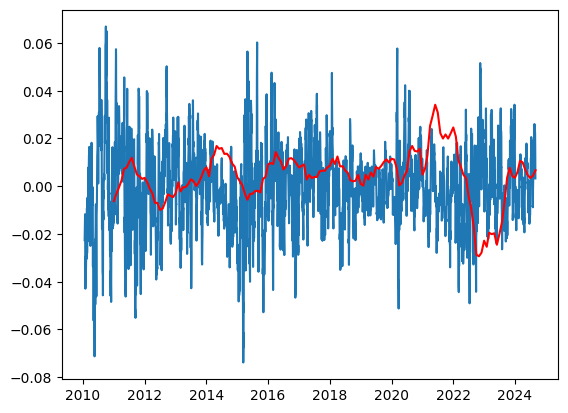

In [29]:
plt.plot(growth_exchange_usd_euro)
plt.plot(diff_inflation_rate, c = 'r')

앞 12개월은 nan 전년대비니까 red안그려짐

두 그래프가 맞느냐

환율이 변동성이 훨씬 큼 왜냐면 데일리 데이터이기에

먼슬리는 더 잘 맞을 수도

## 이제 한국으로 해보자

In [30]:
us_cpi_yoy = us_cpi.pct_change(periods = 12)
euro_cpi_yoy = euro_cpi.pct_change(periods = 12)
kor_cpi_yoy = kor_cpi.pct_change(periods = 12)

In [31]:
exchange_usd_won = pdr.DataReader("DEXKOUS", "fred", start_date, end_date)
uskor_exchange_rate = us_cpi_yoy["CPIAUCSL"] - kor_cpi_yoy["KORCPIALLMINMEI"]

In [32]:
growth_exchange_usd_won = exchange_usd_won.pct_change(periods = 12)

<ipython-input-32-437f41810c46>:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth_exchange_usd_won = exchange_usd_won.pct_change(periods = 12)


In [33]:
exchange_krwusd_month = exchange_krwusd.resample("M").last()
exchange_usdeuro_month = exchange_usd_euro.resample("M").last()
# 종가 그니까 마지막 날을 기준으로

<ipython-input-33-e4651a40216a>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  exchange_krwusd_month = exchange_krwusd.resample("M").last()
<ipython-input-33-e4651a40216a>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  exchange_usdeuro_month = exchange_usd_euro.resample("M").last()


In [34]:
growth_exchange_usdeuro = exchange_usdeuro_month.pct_change(periods = 12)
growth_exchange_krwusd = exchange_krwusd_month.pct_change(periods = 12)

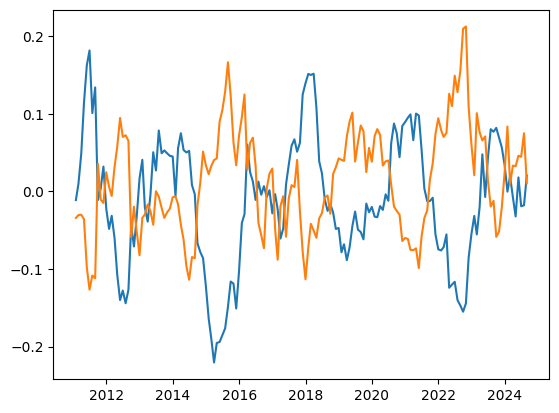

In [36]:
plt.plot(growth_exchange_usdeuro)
plt.plot(growth_exchange_krwusd)

In [37]:
euro_cpi_yoy.columns

Index(['CP0000EZ19M086NEST'], dtype='object')

In [38]:
kor_cpi_yoy.columns

Index(['KORCPIALLMINMEI'], dtype='object')

In [39]:
diff_inflation_rate = us_cpi_yoy["CPIAUCSL"] - euro_cpi_yoy["CP0000EZ19M086NEST"]
diff_inflation_rate_krw = us_cpi_yoy["CPIAUCSL"] - kor_cpi_yoy["KORCPIALLMINMEI"]

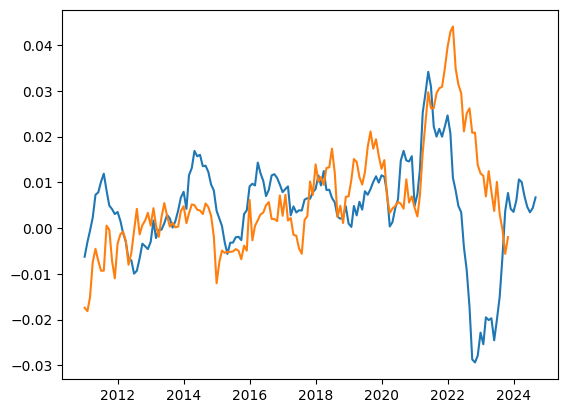

In [44]:
plt.plot(diff_inflation_rate)
plt.plot(diff_inflation_rate_krw)

In [41]:
growth_exchange_usdeuro = exchange_usdeuro_month.pct_change(periods = 1) # 1로 하는게 더 잘맞는다
growth_exchange_krwusd = exchange_krwusd_month.pct_change(periods = 1)

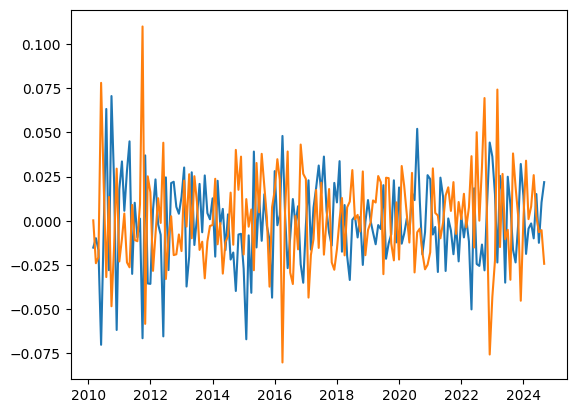

In [45]:
plt.plot(growth_exchange_usdeuro)
plt.plot(growth_exchange_krwusd)